# Level 11: Advanced Topics

This notebook covers a selection of more specialized but powerful NumPy features, including creating your own universal functions, handling missing data with masked arrays, polynomial fitting, and saving/loading array data.

In [1]:
import numpy as np

## 11.1 Custom Universal Functions (ufuncs)

While NumPy has a huge library of ufuncs, you might need to apply a custom Python function to an array element-wise. You can 'vectorize' a Python function to behave like a ufunc.

### `@np.vectorize`
The `@np.vectorize` decorator is a convenient way to create a ufunc. **Note:** This is primarily for convenience, not for performance. The underlying calculation still uses a Python loop.

In [2]:
@np.vectorize
def my_custom_func(x):
    """Return x if x is even, otherwise return x*10"""
    if x % 2 == 0:
        return x
    else:
        return x * 10

arr = np.arange(10)
my_custom_func(arr)

array([ 0, 10,  2, 30,  4, 50,  6, 70,  8, 90])

## 11.2 Masked Arrays

The `np.ma` module provides a way to handle missing or invalid data in arrays. A masked array is a combination of a standard `ndarray` and a boolean mask, where `True` indicates that the corresponding value is invalid.

In [3]:
x = np.array([1, 2, 3, -1, 5])

# Create a masked array where values less than 0 are masked
masked_arr = np.ma.masked_where(x < 0, x)
print(f"Masked array: {masked_arr}")

Masked array: [1 2 3 -- 5]


Computations on masked arrays ignore the masked values.

In [4]:
print(f"Mean of original array: {x.mean()}")
print(f"Mean of masked array: {masked_arr.mean()}")

Mean of original array: 2.0
Mean of masked array: 2.75


## 11.3 Polynomial Fitting

NumPy has functions for fitting a polynomial curve to a set of data points.

In [5]:
# Create some sample data with a quadratic relationship
x = np.linspace(0, 10, 20)
y = 2 * x**2 - 5 * x + 3 + np.random.normal(0, 5, 20)

# Fit a polynomial of degree 2 (quadratic)
coeffs = np.polyfit(x, y, 2)
print(f"Coefficients (a, b, c): {coeffs}")

Coefficients (a, b, c): [ 2.06833139 -5.47674868  3.52148481]


You can then use `np.poly1d` to create a callable polynomial function from the coefficients.

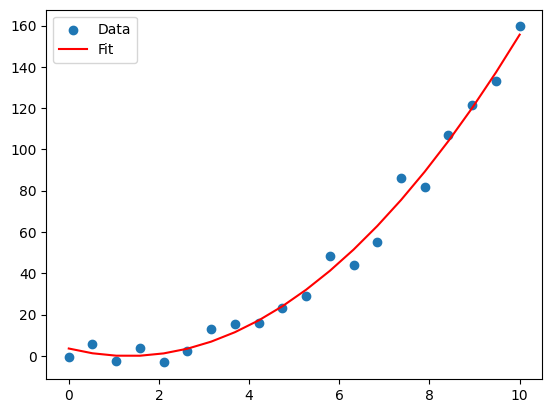

In [6]:
p = np.poly1d(coeffs)

# We can now use p to evaluate the polynomial at any x
y_fit = p(x)

# Optional: Plotting with Matplotlib to see the fit
import matplotlib.pyplot as plt
plt.scatter(x, y, label='Data')
plt.plot(x, y_fit, color='red', label='Fit')
plt.legend()
plt.show()

## 11.4 Histograms

In [7]:
data = np.random.randn(1000) # Sample data from normal distribution

### `np.histogram()`
Computes the histogram of a set of data. It returns the counts in each bin and the bin edges.

In [8]:
counts, bin_edges = np.histogram(data, bins=10)
print("Counts:", counts)
print("Bin Edges:", bin_edges)

Counts: [ 15  63 149 231 237 186  77  29  12   1]
Bin Edges: [-2.65122393 -2.02072139 -1.39021884 -0.75971629 -0.12921374  0.5012888
  1.13179135  1.7622939   2.39279644  3.02329899  3.65380154]


### `np.bincount()`
A more efficient function for counting the occurrences of each value in an array of non-negative integers.

In [9]:
int_data = np.random.randint(0, 5, size=20)
print("Data:", int_data)
print("Counts of each integer:", np.bincount(int_data))

Data: [3 2 4 2 2 0 3 0 0 4 3 2 0 1 4 0 0 0 2 4]
Counts of each integer: [7 1 5 3 4]


## 11.5 Saving & Loading Data

### Binary Format (`.npy`)
The standard, efficient way to save a single NumPy array to disk.

In [10]:
arr = np.arange(10)
np.save('my_array.npy', arr)

loaded_arr = np.load('my_array.npy')
print(f"Loaded array: {loaded_arr}")

Loaded array: [0 1 2 3 4 5 6 7 8 9]


### Text Format (`.txt`, `.csv`)
For saving data in a human-readable format.

In [11]:
arr2d = np.arange(12).reshape(3, 4)
np.savetxt('my_array.csv', arr2d, delimiter=',')

loaded_txt = np.loadtxt('my_array.csv', delimiter=',')
print("Loaded text array:\n", loaded_txt)

Loaded text array:
 [[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]]


### Compressed Format (`.npz`)
For saving multiple arrays into a single compressed file.

In [12]:
a = np.arange(10)
b = np.arange(10, 20)

np.savez('my_archive.npz', array_a=a, array_b=b)

archive = np.load('my_archive.npz')
print("Loaded array 'a':", archive['array_a'])
print("Loaded array 'b':", archive['array_b'])

Loaded array 'a': [0 1 2 3 4 5 6 7 8 9]
Loaded array 'b': [10 11 12 13 14 15 16 17 18 19]
